# Modifying forcing to remove DPC—EDF pairs
This notebook creates modified forcing files for ECCOv4r4 reproduction simulations in which the DPC–EDF pairs are regressed out. It is assumed the user is comfortable with setting up simulations to reproduce the ECCOv4r4 state estimate, as described in Section 2.1.4 (regular forcing) and 2.5.2 (flux forcing) of `ECCO_adjoint_instructions.pdf`, or in the [ECCOv4r4 reproduction instructions](https://ecco-group.org/docs/v4r4_reproduction_howto.pdf).

The process of running ECCO with modified forcing is described in Section 2.4 of `ECCO_adjoint_instructions.pdf`, but the approach taken is to create a second directory alongside `input_forcing`, e.g. `input_forcing_modified`, and then edit the `data.exf` namelist file to tell the model to look in the second directory for certain (modified) forcing variables.

While the first part of this notebook regresses EDF—DPC pairs out of the forcing, the second part adds a perturbation with the structure of the EDF and magnitude equal to one standard deviation of the DPC time series. The procedure is effectively identical, but the DPC time series is replaced with a time series of all zeros except during the first four entries (i.e. the first day) where the value is set to the standard deviation.

These modified runs can then be executed as would be the ECCOv4r4 reproduction run. At the end of the notebook is a copy of the `data.diagnostics` namelist used to produce month-average output of certain variables for analysis in our study. After running the model, the script `mds_to_netcdf.py` can be run to convert the model output from binary MDS format to netCDF.

# Load DPC—EDF pairs (calculated in `3_`...`.ipynb`)

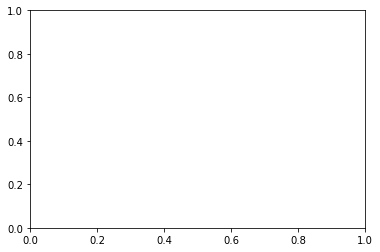

In [1]:
from DPC_functions import *

In [2]:
################# Heat flux
DPC_hflux=np.load('DPC_hflux.npy')
EDF_hflux=np.load('EDF_hflux.npy')

################## Wind stress
DPC_tauxy=np.load('DPC_tauxy.npy')
EDF_tauxy=np.load('EDF_tauxy.npy')

# Regress DPC—EDF pairs out of forcing
## Heat flux

In [ ]:
eccorundir='/wherever/you/set/up/modified_forcing_runs/'

outdir=(eccorundir+'DPC_hflux/input_forcing_modified/')
os.mkdir(outdir)
remove_forcing_pattern(EDF_hflux.flatten(),DPC_hflux.flatten(),'heat',output_dir=outdir,return_original_forcing=False)

----
## Wind stress


In [ ]:
eccorundir='/wherever/you/set/up/modified_forcing_runs/'

outdir=(eccorundir+'DPC_tauxy/input_forcing_modified/')
os.mkdir(outdir)
remove_forcing_pattern(EDF_tauxy.flatten(),DPC_tauxy.flatten(),'wind',output_dir=outdir,return_original_forcing=False)

---
# Perturb forcing with the leading DPC
## Heat flux

In [ ]:
eccorundir='/wherever/you/set/up/perturbed_forcing_runs/'

outdir=(eccorundir+'DPC_hflux/input_forcing_modified/')
os.mkdir(outdir)
t=np.zeros(np.shape(DPC_hflux.flatten()))
t[:4]=DPC_hflux.std()
remove_forcing_pattern(EDF_hflux.flatten(),t,'heat',output_dir=outdir,return_original_forcing=False)

## Wind stress

In [ ]:
eccorundir='/wherever/you/set/up/perturbed_forcing_runs/'

outdir=(eccorundir+'DPC_tauxy/input_forcing_modified/')
os.mkdir(outdir)
t=np.zeros(np.shape(DPC_tauxy.flatten()))
t[:4]=DPC_tauxy.std()
remove_forcing_pattern(EDF_tauxy.flatten(),t,'wind',output_dir=outdir,return_original_forcing=False)

# `data.diagnostics` output namelist

```
# Diagnostic Package Choices
### MINIMAL VERSION: produces month-averaged ocean prognostic variables in the
#                    diags folder with no sub-directory structure
#-----------------
# for each output-stream:
#  filename(n) : prefix of the output file name (only 8.c long) for outp.stream n
#  frequency(n):< 0 : write snap-shot output every multiple of |frequency| (iter)
#               > 0 : write time-average output every multiple of frequency (iter)
#  levels(:,n) : list of levels to write to file (Notes: declared as REAL)
#                 when this entry is missing, select all common levels of this list
#  fields(:,n) : list of diagnostics fields (8.c) (see "available_diagnostics" file
#                 for the list of all available diag. in this particular config)
#--------------------------------------------------------------------
#
 &diagnostics_list
#
    dumpatlast = .TRUE.,
#   diag_mnc   = .TRUE., 
# (the above for NetCDF i/o with pkg/mnc https://mitgcm.readthedocs.io/en/latest/outp_pkgs/outp_pkgs.html#netcdf-i-o-pkg-mnc)
#---
frequency(1) = 2635200.0,
fields(1,1) = 'THETA',
filename(1) = 'diags/THETA'
#---
frequency(2) = 2635200.0,
fields(1,2) = 'SALT',
filename(2) = 'diags/SALT'
#---
frequency(3) = 2635200.0,
fields(1,3) = 'UVELMASS'
filename(3) = 'diags/UVELMASS'
#---
frequency(4) = 2635200.0,
fields(1,4) = 'VVELMASS'
filename(4) = 'diags/VVELMASS'
#---
frequency(5) = 2635200.0,
fields(1,5) = 'RHOAnoma'
filename(5) = 'diags/RHOAnoma'
#---
frequency(6) = 2635200.0,
fields(1,6) = 'SSH',
filename(6) = 'diags/SSH'
#---
frequency(7) = 2635200.0,
fields(1,7) = 'ETAN',
filename(7) = 'diags/ETAN'
#---
frequency(8) = 2635200.0,
fields(1,8) = 'UTHMASS',
filename(8) = 'diags/UTHMASS'
#---
frequency(9) = 2635200.0,
fields(1,9) = 'VTHMASS',
filename(9) = 'diags/VTHMASS'
#---
frequency(10) = 2635200.0,
fields(1,10) = 'MXLDEPTH',
filename(10) = 'diags/MXLDEPTH'
#---
frequency(11) = 2635200.0,
fields(1,11) = 'oceTAUX',
filename(11) = 'diags/oceTAUX'
#---
frequency(12) = 2635200.0,
fields(1,12) = 'oceTAUY',
filename(12) = 'diags/oceTAUY'
#---



  /
#
#
# Parameter for Diagnostics of per level statistics:
#-----------------
# for each output-stream:
#  stat_fname(n) : prefix of the output file name (only 8.c long) for outp.stream n
#  stat_freq(n):< 0 : write snap-shot output every |stat_freq| seconds
#               > 0 : write time-average output every stat_freq seconds
#  stat_phase(n)    : write at time = stat_phase + multiple of |stat_freq|
#  stat_region(:,n) : list of "regions" (default: 1 region only=global)
#  stat_fields(:,n) : list of diagnostics fields (8.c) (see "available_diagnostics.log"
#                 file for the list of all available diag. in this particular config)
#-----------------
 &DIAG_STATIS_PARMS
# diagSt_regMaskFile='basin_masks_eccollc_90x50.bin',
# nSetRegMskFile=1,
# set_regMask(1)= 1,  1,  1,  1,  1,  1,  1,  1,  1,
#                 1,  1,  1,  1,  1,  1,  1,  1
# val_regMask(1)= 1., 2., 3., 4., 5., 6., 7., 8., 9.,
#                10.,11.,12.,13.,14.,15.,16.,17.
##---
# stat_fields(1,1)= 'ETAN    ','ETANSQ  ','DETADT2 ',
#                   'UVEL    ','VVEL    ','WVEL    ',
#                   'THETA   ','SALT    ',
#    stat_fname(1)= 'dynStDiag',
#     stat_freq(1)= 3153600.,
# stat_region(1,1)=  1, 2, 3, 4, 5, 6, 7, 8, 9,
#                   10,11,12,13,14,15,16,17
##---
# stat_fields(1,2)= 'oceTAUX ','oceTAUY ',
#                   'surForcT','surForcS','TFLUX   ','SFLUX   ',
#                   'oceQnet ','oceSflux','oceFWflx',
#    stat_fname(2)= 'surfStDiag',
#     stat_freq(2)= 3153600.,
# stat_region(1,2)=  1, 2, 3, 4, 5, 6, 7, 8, 9,
#                   10,11,12,13,14,15,16,17
  /
```